# Bike Sharing Assignment

## Step 1 : Reading and Understanding Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")

In [2]:
# reading data
df = pd.read_csv("day.csv")
pd.set_option('display.max_columns', None)

In [3]:
# checking shape of dataframe
df.shape

(730, 16)

In [4]:
# printing top 5 rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# printing bottom 5 rows
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
# checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


***

**Inference :**
There are no missing values in the dataset.

***

In [7]:
# statistical summary of numerical variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking data types of variables
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Step 2 : Data Cleaning And EDA

In [9]:
# Removing unnecessary columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
# Validating if 4 unnecessary columns has been dropped
df.shape

(730, 12)

### Identifying non-binary categorical variables and renaming the categorical values

In [10]:
# Value count of season
print("season")
print(df.season.value_counts())

# Renaming categorical values of season
cleanup_nums = {"season" : {1 : "spring", 2 : "summer", 3 : "fall", 4 : "winter"}}
df = df.replace(cleanup_nums)
print(df.season.value_counts())

season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [11]:
# Value count of Month
print("mnth")
print(df.mnth.value_counts())

# Renaming categorical values of mnth
cleanup_nums = {"mnth" : {1 : "jan", 2 : "feb", 3 : "mar", 4 : "apr",
                          5: "may", 6 : "jun", 7 : "jul", 8 : "aug",
                          9 : "sept", 10 : "oct", 11 : "nov", 12 : "dec"
                         }}
df = df.replace(cleanup_nums)
print(df.mnth.value_counts())

mnth
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
oct     62
mar     62
dec     62
may     62
aug     62
jul     62
jan     62
nov     60
apr     60
sept    60
jun     60
feb     56
Name: mnth, dtype: int64


In [12]:
# Value count of Weekday
print("weekday")
print(df.weekday.value_counts())

# Renaming categorical values of weekday
# From 'dteday' column which we dropped, we concluded the below mentioned weekday values
cleanup_nums = {"weekday" : { 0 : "tue", 1 : "wed", 2 : "thur",
                             3 : "fri", 4 : "sat", 5 : "sun", 6 : "mon"
                         }}
df = df.replace(cleanup_nums)
print(df.weekday.value_counts())

weekday
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
mon     105
tue     105
wed     105
thur    104
sat     104
sun     104
fri     103
Name: weekday, dtype: int64


In [13]:
# Value count of Weather
print("weathersit")
print(df.weathersit.value_counts())

# Renaming categorical values of weathersit
cleanup_nums = {"weathersit" : {1 : "clear", 2 : "misty", 3 : "light_snow_or_rain", 4 : "heavy_snow_or_rain"}}
df = df.replace(cleanup_nums)
print(df.weathersit.value_counts())

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64
clear                 463
misty                 246
light_snow_or_rain     21
Name: weathersit, dtype: int64


In [14]:
# Checking shape of dataframe
print(df.shape)

# Validating changes made
df.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# checking datatypes of columns
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Visualization

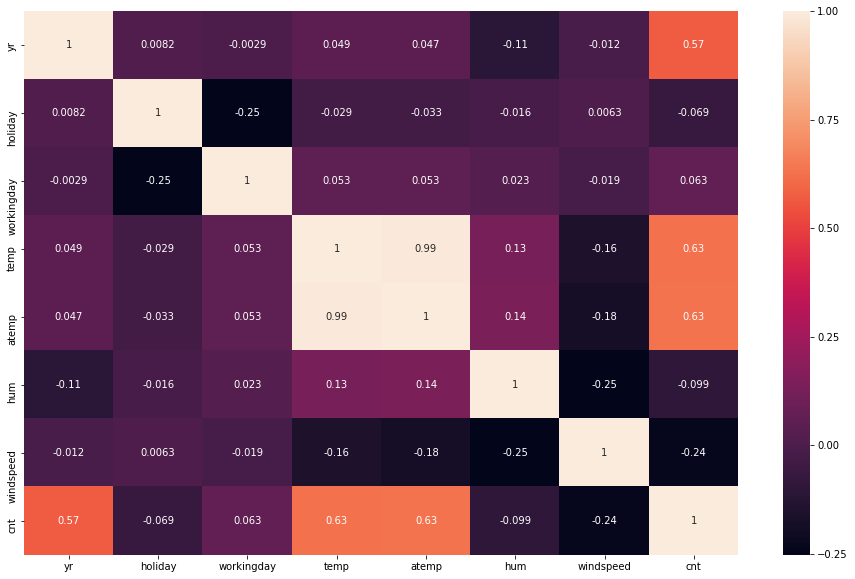

In [16]:
# heatmap to identify correlations 
plt.figure(figsize= (16,10))
sns.heatmap( df.corr(), annot = True)

***

**Inference :**
Correlation is highest (= 0.99) for atemp and temp. So we can remove one of them.

***

In [17]:
# dropping atemp since correlation is highest between atemp and temp
df = df.drop(['atemp'], axis=1)

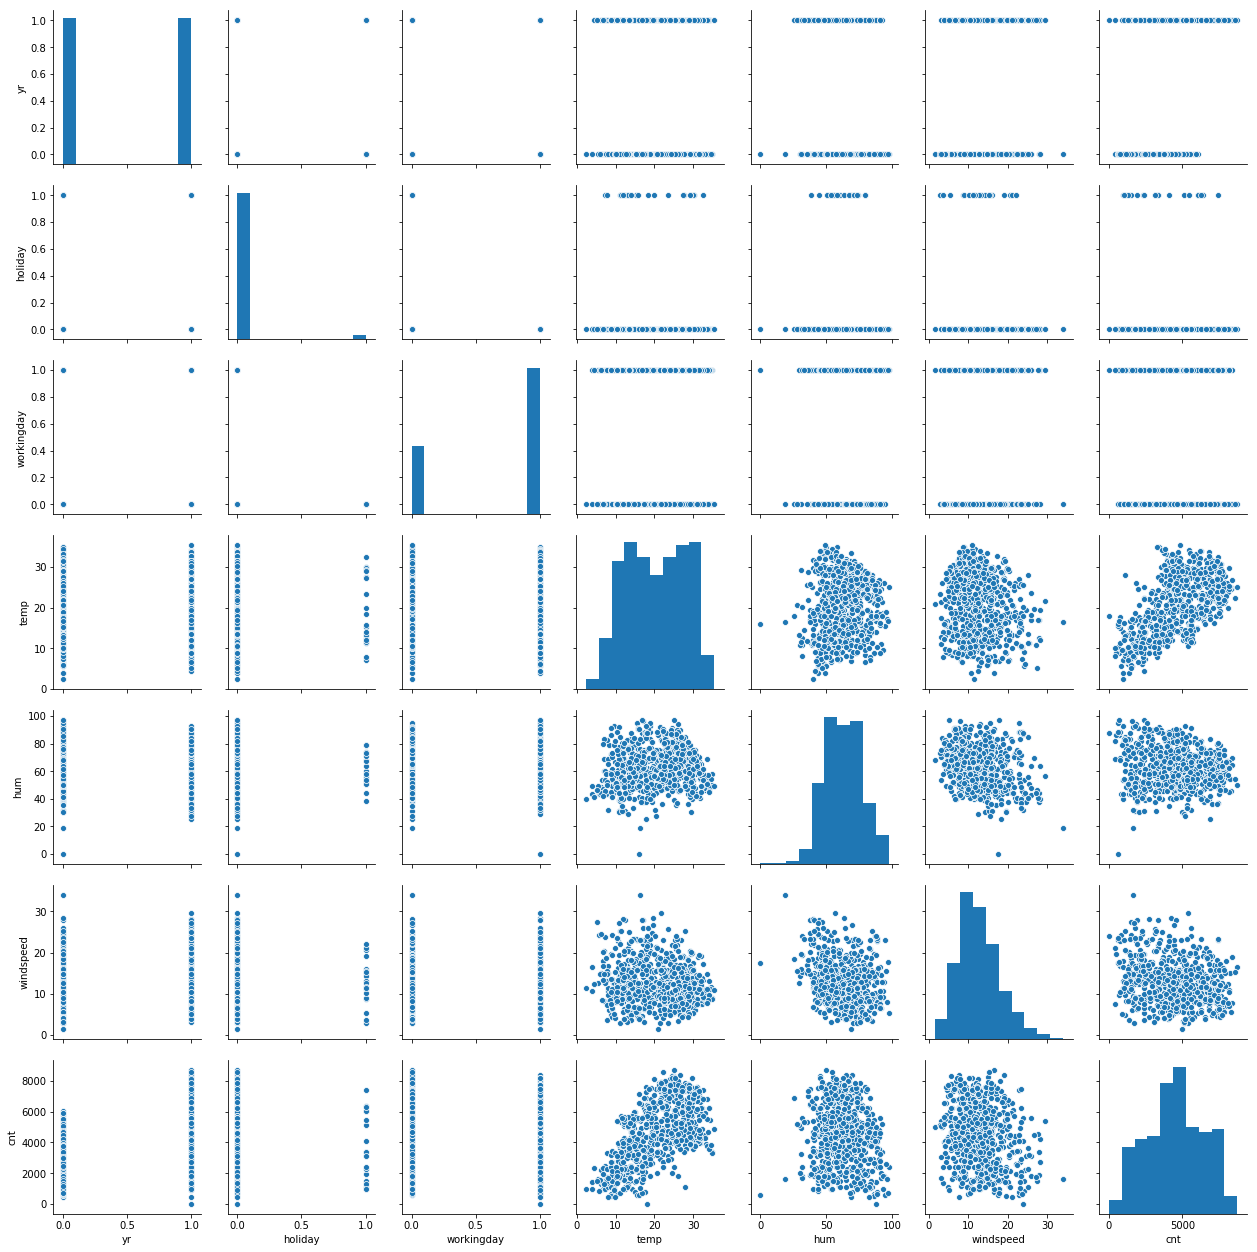

In [18]:
# pairplot
sns.pairplot(df)

***

**Inference :**
 Temperature v/s count of total rental bikes has some linear relationship.
 
***

In [19]:
# Creating a function for barplot
def barplot(x_value):
    ax = sns.barplot(x=x_value, y='cnt', data=df, estimator=np.mean )
    return ax

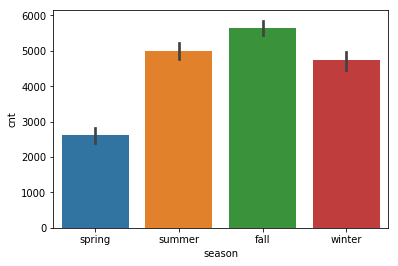

In [20]:
# Barplot of Season and Count of total rental bikes
barplot('season')

***

**Inference :**
 More bikes are rented during  fall.
***

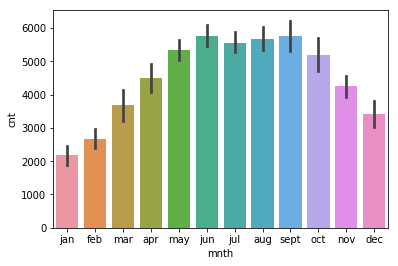

In [21]:
# Barplot of Month and Count of total rental bikes
barplot('mnth')

***

**Inference :**
Most number of bikes are rented from  May to October

***

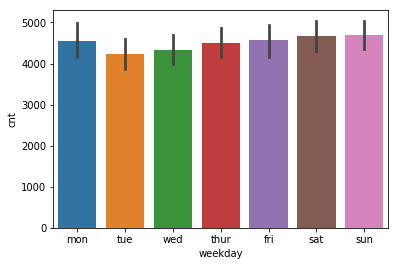

In [22]:
# Barplot of Wekday and Count of total rental bikes
barplot('weekday')

***

**Inference :**
 No significant insight from number of bikes rented vs  weekday.
 
***

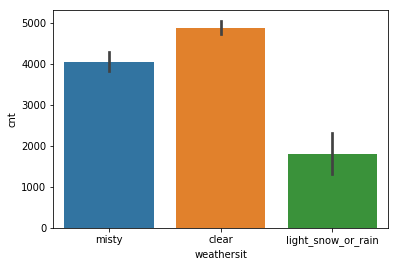

In [23]:
# Barplot of Weathersit and Count of total rental bikes
barplot('weathersit')

***

**Inference :**

People mostly prefer to opt for rented bikes during clear weather and less during light snow or rain. No one in this dataset has opted for rented bike during heavy snowfall or heavy rains.
 
***


## Step 3 : Data Preparation - Preparing the Data For Modelling

In [24]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


### Create Dummy Variables

In [25]:
# Create dummy variables for season, mnth, weekday, weathersit
season_dummy = pd.get_dummies(df.season, drop_first= True)
mnth_dummy = pd.get_dummies(df.mnth, drop_first= True)
weekday_dummy = pd.get_dummies(df.weekday, drop_first= True)
weathersit_dummy = pd.get_dummies(df.weathersit, drop_first= True)

In [26]:
# Concatenate dummy dataframe with orginal dataframe
df = pd.concat([df, season_dummy], axis = 1)
df = pd.concat([df, mnth_dummy], axis = 1)
df = pd.concat([df, weekday_dummy], axis = 1)
df = pd.concat([df, weathersit_dummy], axis = 1)

In [27]:
# Removing columns - season, mnth, weekday, weathersit
# Already created dummy variables for the columns we are dropping
df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis= 1)

In [28]:
# Checking shape of dataframe
df.shape

(730, 29)

In [29]:
# Printing first 5 rows to validate data preparation
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thur,tue,wed,light_snow_or_rain,misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [30]:
# Splitting into train and test
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 0)

In [31]:
# Checking shape of Training Dataframe
print(df_train.shape)

(510, 29)


In [32]:
# Checking shape of Test Dataframe
df_test.shape

(220, 29)

### Perform Feature Scaling

In [33]:
# Rescaling the features using Min-Max Scaling
# Instantiating Object
scaler = MinMaxScaler()

In [34]:
# Creating list of numeric variables 
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [35]:
# learn and transform
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
# Validating Feature Scaling
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thur,tue,wed,light_snow_or_rain,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.029412,0.690196,0.514246,0.514303,0.373352,0.514084,0.245098,0.258824,0.241176,0.082353,0.082353,0.074510,0.088235,0.076471,0.086275,0.090196,0.086275,0.082353,0.086275,0.076471,0.145098,0.141176,0.137255,0.143137,0.135294,0.145098,0.023529,0.335294
std,0.500487,0.169124,0.462867,0.242926,0.194712,0.192759,0.217119,0.430568,0.438419,0.428217,0.275172,0.275172,0.262857,0.283915,0.266010,0.281045,0.286744,0.281045,0.275172,0.281045,0.266010,0.352545,0.348545,0.344454,0.350557,0.342373,0.352545,0.151726,0.472557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.361513,0.232054,0.365221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.499006,0.513631,0.352763,0.521859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.651342,0.482854,0.670156,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***

**Inference :**

max value for hum, temp, windspeed and cnt is 1 and min is 0. Hence, we validated that numerical variables have been scaled.
 
***

### Divide data into X and y

In [37]:
# Dividing data into X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
# Validating X and y divide
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


## Step 4 : Data Modelling

In [39]:
# Fitting Linear model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# Running RFE (Recursive Feature Elimination) with output number of variables 15
rfe = RFE(lm, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 6),
 ('mar', False, 12),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sept', True, 1),
 ('mon', True, 1),
 ('sat', False, 14),
 ('sun', False, 13),
 ('thur', False, 9),
 ('tue', True, 1),
 ('wed', False, 8),
 ('light_snow_or_rain', True, 1),
 ('misty', False, 4)]

In [42]:
# Checking columns with RFE support true
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'jul', 'nov', 'sept', 'mon', 'tue',
       'light_snow_or_rain'],
      dtype='object')

In [43]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding Constant Variables
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# Create and fit model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [46]:
# Statistical summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     159.4
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          4.16e-173
Time:                        20:28:15   Log-Likelihood:                 490.87
No. Observations:                 510   AIC:                            -951.7
Df Residuals:                     495   BIC:                            -888.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2774      0.022     12.457      0.000       0.234       0.321
yr                     0.2193      0.008     25.860      0.000       0.203       0.236
holiday                0.0323      0.021      1.564      0.119      -0.008       0.073
workingday             0.0869      0.009      9.913      0.000       0.070       0.104
temp                   0.4411      0.031     14.451      0.000       0.381       0.501
hum                   -0.1999      0.025     -8.087      0.000      -0.248      -0.151
windspeed             -0.1459      0.023     -6.247      0.000      -0.192      -0.100
spring                -0.1216      0.016     -7.702      0.000      -0.153      -0.091
winter                 0.0678      0.015      4.610      0.000       0.039       0.097
dec                   -0.0398      0.018     -2.250      0.025      -0.075      -0.005
jul                   -0.0741      0.018     -4.144      0.000      -0.109      -0.039
nov                   -0.0560      0.020     -2.818      0.005      -0.095      -0.017
sept                   0.0574      0.017      3.461      0.001       0.025       0.090
mon                    0.0966      0.012      8.345      0.000       0.074       0.119
tue                    0.0616      0.012      5.162      0.000       0.038       0.085
light_snow_or_rain    -0.1571      0.030     -5.246      0.000      -0.216      -0.098
==============================================================================
Omnibus:                       71.396   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.894
Skew:                          -0.743   Prob(JB):                     1.56e-36
Kurtosis:                       5.357   Cond. No.                     1.75e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

__Note :__

We want __p-value <= 0.05__ and __VIF < 5__. 

We will now be taking decision based on the below conditions:

1. High VIF and High p-value : 
        drop columns
2. Low VIF and Low p-value : 
        keep columns
3. Low VIF and High p-value : 
        Remove these variables first and create model to check if VIF has changed for other variables.
4. High VIF and Low p-value :
        Remove these after step 3 is done.

In [47]:
def model_building(drop_columns) :
    # Dropping columns
    X_train_new = X_train_rfe.drop(drop_columns, axis=1)
    # Rebuilding Model without tue
    X_train_lm = sm.add_constant(X_train_new)
    # Running linear model
    lm = sm.OLS(y_train, X_train_lm).fit()
    # Checking Summary
    return lm.summary()

In [48]:
# Since holiday has high p-value (0.119), dropping holiday.
drop_columns_list = ['holiday']
model_building(['holiday'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     159.4
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          4.16e-173
Time:                        20:28:15   Log-Likelihood:                 490.87
No. Observations:                 510   AIC:                            -951.7
Df Residuals:                     495   BIC:                            -888.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3097      0.037      8.474      0.000       0.238       0.382
yr                     0.2193      0.008     25.860      0.000       0.203       0.236
workingday             0.0546      0.025      2.182      0.030       0.005       0.104
temp                   0.4411      0.031     14.451      0.000       0.381       0.501
hum                   -0.1999      0.025     -8.087      0.000      -0.248      -0.151
windspeed             -0.1459      0.023     -6.247      0.000      -0.192      -0.100
spring                -0.1216      0.016     -7.702      0.000      -0.153      -0.091
winter                 0.0678      0.015      4.610      0.000       0.039       0.097
dec                   -0.0398      0.018     -2.250      0.025      -0.075      -0.005
jul                   -0.0741      0.018     -4.144      0.000      -0.109      -0.039
nov                   -0.0560      0.020     -2.818      0.005      -0.095      -0.017
sept                   0.0574      0.017      3.461      0.001       0.025       0.090
mon                    0.0643      0.027      2.401      0.017       0.012       0.117
tue                    0.0293      0.027      1.084      0.279      -0.024       0.082
light_snow_or_rain    -0.1571      0.030     -5.246      0.000      -0.216      -0.098
==============================================================================
Omnibus:                       71.396   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.894
Skew:                          -0.743   Prob(JB):                     1.56e-36
Kurtosis:                       5.357   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Since tue has high p-value, dropping tue as well
drop_columns_list = ['holiday', 'tue']
model_building(drop_columns_list)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     171.5
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          5.58e-174
Time:                        20:28:15   Log-Likelihood:                 490.26
No. Observations:                 510   AIC:                            -952.5
Df Residuals:                     496   BIC:                            -893.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3341      0.029     11.586      0.000       0.277       0.391
yr                     0.2198      0.008     25.939      0.000       0.203       0.236
workingday             0.0305      0.012      2.653      0.008       0.008       0.053
temp                   0.4397      0.031     14.417      0.000       0.380       0.500
hum                   -0.1994      0.025     -8.066      0.000      -0.248      -0.151
windspeed             -0.1451      0.023     -6.217      0.000      -0.191      -0.099
spring                -0.1221      0.016     -7.743      0.000      -0.153      -0.091
winter                 0.0683      0.015      4.645      0.000       0.039       0.097
dec                   -0.0407      0.018     -2.299      0.022      -0.075      -0.006
jul                   -0.0743      0.018     -4.157      0.000      -0.109      -0.039
nov                   -0.0589      0.020     -2.989      0.003      -0.098      -0.020
sept                   0.0574      0.017      3.461      0.001       0.025       0.090
mon                    0.0403      0.015      2.680      0.008       0.011       0.070
light_snow_or_rain    -0.1575      0.030     -5.259      0.000      -0.216      -0.099
==============================================================================
Omnibus:                       73.627   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.690
Skew:                          -0.761   Prob(JB):                     5.22e-38
Kurtosis:                       5.401   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculate VIF for the model to be certain
# We need to check how collinear a variable is w.r.t all other variables using VIF
X_train_new = X_train_rfe.drop(drop_columns_list, axis=1)
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
2,temp,10.01
3,hum,8.25
1,workingday,4.66
4,windspeed,4.20
6,winter,2.70
5,spring,2.18
0,yr,2.06
9,nov,1.78
11,mon,1.77
7,dec,1.46


In [51]:
# Dropping humidity with high VIF. Checking if temperature has any effect by removing humidity.
# Removing temperature -> r2 goes down significantly. So removing humidity.
drop_columns_list = ['holiday', 'tue', 'hum']
model_building(drop_columns_list)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          6.92e-162
Time:                        20:28:16   Log-Likelihood:                 458.83
No. Observations:                 510   AIC:                            -891.7
Df Residuals:                     497   BIC:                            -836.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2229      0.027      8.283      0.000       0.170       0.276
yr                     0.2273      0.009     25.396      0.000       0.210       0.245
workingday             0.0350      0.012      2.866      0.004       0.011       0.059
temp                   0.4160      0.032     12.896      0.000       0.353       0.479
windspeed             -0.1003      0.024     -4.163      0.000      -0.148      -0.053
spring                -0.1165      0.017     -6.956      0.000      -0.149      -0.084
winter                 0.0567      0.016      3.646      0.000       0.026       0.087
dec                   -0.0474      0.019     -2.522      0.012      -0.084      -0.010
jul                   -0.0586      0.019     -3.102      0.002      -0.096      -0.021
nov                   -0.0456      0.021     -2.184      0.029      -0.087      -0.005
sept                   0.0386      0.017      2.215      0.027       0.004       0.073
mon                    0.0421      0.016      2.634      0.009       0.011       0.073
light_snow_or_rain    -0.2369      0.030     -7.880      0.000      -0.296      -0.178
==============================================================================
Omnibus:                       81.637   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.510
Skew:                          -0.859   Prob(JB):                     1.05e-39
Kurtosis:                       5.345   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_train_new = X_train_rfe.drop(drop_columns_list, axis=1)
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate VIF for the model to be certain
# We need to check how collinear a variable is w.r.t all other variables using VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
2,temp,6.25
1,workingday,4.56
3,windspeed,4.20
5,winter,2.45
0,yr,2.05
4,spring,1.89
8,nov,1.78
10,mon,1.75
6,dec,1.44
7,jul,1.37


__Inference:__

temp VIF has gone down significantly after removing hum. But we want it to be less then 5.

Also, removing temp reduces R2 and adj R2 significantly. So we must manually identify variable which will help bring VIF value of temp down.

In [53]:
# Dropping columns after trial and errors the similar way as above.
drop_columns_list = ['holiday', 'tue', 'hum', 'jul', 'nov', 'dec']
model_building(drop_columns_list)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     204.1
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          3.55e-161
Time:                        20:28:16   Log-Likelihood:                 448.99
No. Observations:                 510   AIC:                            -878.0
Df Residuals:                     500   BIC:                            -835.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2165      0.026      8.192      0.000       0.165       0.268
yr                     0.2273      0.009     25.050      0.000       0.209       0.245
workingday             0.0357      0.012      2.883      0.004       0.011       0.060
temp                   0.4049      0.029     13.781      0.000       0.347       0.463
windspeed             -0.0918      0.024     -3.777      0.000      -0.140      -0.044
spring                -0.1162      0.017     -6.945      0.000      -0.149      -0.083
winter                 0.0369      0.014      2.643      0.008       0.009       0.064
sept                   0.0536      0.017      3.091      0.002       0.020       0.088
mon                    0.0408      0.016      2.522      0.012       0.009       0.073
light_snow_or_rain    -0.2362      0.030     -7.765      0.000      -0.296      -0.176
==============================================================================
Omnibus:                       67.946   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.195
Skew:                          -0.769   Prob(JB):                     1.97e-29
Kurtosis:                       4.964   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_train_new = X_train_rfe.drop(drop_columns_list, axis=1)
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate VIF for the model to be certain
# We need to check how collinear a variable is w.r.t all other variables using VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
2,temp,4.98
1,workingday,4.42
3,windspeed,4.09
0,yr,2.03
4,spring,1.86
7,mon,1.70
5,winter,1.43
6,sept,1.14
8,light_snow_or_rain,1.08


In [55]:
X_train = X_train_new

In [56]:
# Fitting Linear model on selected features
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     204.1
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          3.55e-161
Time:                        20:28:16   Log-Likelihood:                 448.99
No. Observations:                 510   AIC:                            -878.0
Df Residuals:                     500   BIC:                            -835.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2165      0.026      8.192      0.000       0.165       0.268
yr                     0.2273      0.009     25.050      0.000       0.209       0.245
workingday             0.0357      0.012      2.883      0.004       0.011       0.060
temp                   0.4049      0.029     13.781      0.000       0.347       0.463
windspeed             -0.0918      0.024     -3.777      0.000      -0.140      -0.044
spring                -0.1162      0.017     -6.945      0.000      -0.149      -0.083
winter                 0.0369      0.014      2.643      0.008       0.009       0.064
sept                   0.0536      0.017      3.091      0.002       0.020       0.088
mon                    0.0408      0.016      2.522      0.012       0.009       0.073
light_snow_or_rain    -0.2362      0.030     -7.765      0.000      -0.296      -0.176
==============================================================================
Omnibus:                       67.946   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.195
Skew:                          -0.769   Prob(JB):                     1.97e-29
Kurtosis:                       4.964   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Coefficient Values
lr_model.params

const                 0.216548
yr                    0.227313
workingday            0.035684
temp                  0.404852
windspeed            -0.091801
spring               -0.116180
winter                0.036866
sept                  0.053631
mon                   0.040844
light_snow_or_rain   -0.236211
dtype: float64

## Step 5 : Residual Analysis

In [58]:
# Predicting Training data
y_train_pred = lr_model.predict(X_train_sm)

In [59]:
# Calculating residual errors
res = y_train - y_train_pred

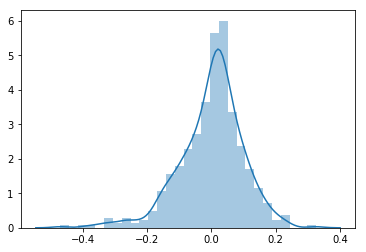

In [60]:
# plotting residual error
sns.distplot(res)

__Inference:__

We see that Error terms are normally distributed with mean zero.

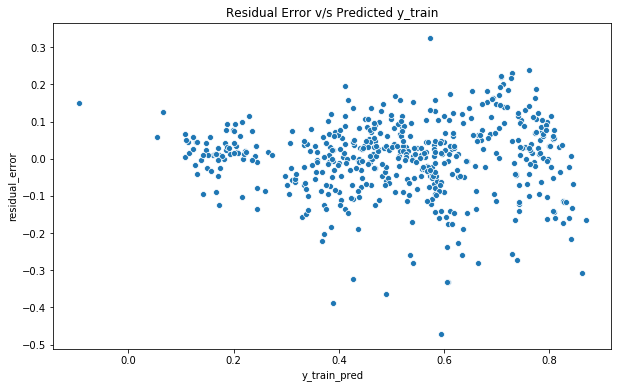

In [61]:
# Scatter plot error vs y_train_pred
plt.figure(figsize=(10,6))
plt.title("Residual Error v/s Predicted y_train")
plt.xlabel("y_train_pred")
plt.ylabel("residual_error")
sns.scatterplot(x=y_train_pred, y=res)
plt.show()

__Inference:__
There is no specific pattern here. So we can conclude that error terms are independent of each other.
Also, error terms have constant variance.

## Step 6 : Prediction

In [62]:
# Transform Test Dataframe
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Validating scaling
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thur,tue,wed,light_snow_or_rain,misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.027273,0.668182,0.538518,0.532982,0.366151,0.520799,0.250,0.236364,0.250,0.090909,0.090909,0.081818,0.077273,0.104545,0.072727,0.072727,0.081818,0.081818,0.081818,0.095455,0.140909,0.145455,0.154545,0.140909,0.163636,0.140909,0.040909,0.340909
std,0.501120,0.163248,0.471940,0.230286,0.205931,0.197966,0.235684,0.434,0.425817,0.434,0.288135,0.288135,0.274713,0.267633,0.306665,0.260281,0.260281,0.274713,0.274713,0.274713,0.294512,0.348721,0.353363,0.362295,0.348721,0.370789,0.348721,0.198531,0.475096
min,0.000000,0.000000,0.000000,-0.048868,-0.353829,-0.049874,0.067073,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.360687,0.387181,0.227015,0.355442,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.565441,0.527552,0.327069,0.520191,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722547,0.678244,0.465036,0.722964,0.250,0.000000,0.250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.982573,0.986079,1.165056,0.981707,1.000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Divide into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
# Columns we dropped in Training Data must be dropped in test data
X_test = X_test[X_train.columns]

In [65]:
# Adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,temp,windspeed,spring,winter,sept,mon,light_snow_or_rain
196,1.0,0,0,0.771285,0.415865,0,0,0,1,0
187,1.0,0,1,0.854058,0.292782,0,0,0,0,0
14,1.0,0,0,0.178804,0.289684,1,0,0,1,0
31,1.0,0,1,0.125012,0.027323,1,0,0,0,0
390,1.0,1,1,0.320391,0.077873,1,0,0,0,0


In [66]:
# predict
y_test_predict = lr_model.predict(X_test_sm)

## Step 7 : Evaluation of Model

In [67]:
# R2 score for training data
r2_score(y_true= y_train, y_pred= y_train_pred)

0.7860590415153338

In [68]:
# R2 score for test data
r2_score(y_true= y_test, y_pred= y_test_predict)

0.8236551555441848

In [69]:
# Adj. R2 for test
# adj r2 = 1- (((1-r2)*(n-1))/(n-p-1))
adj_r2_test = 1- (((1-0.8237)*(220-1))/(220-9-1))
print(adj_r2_test)

0.8161442857142857


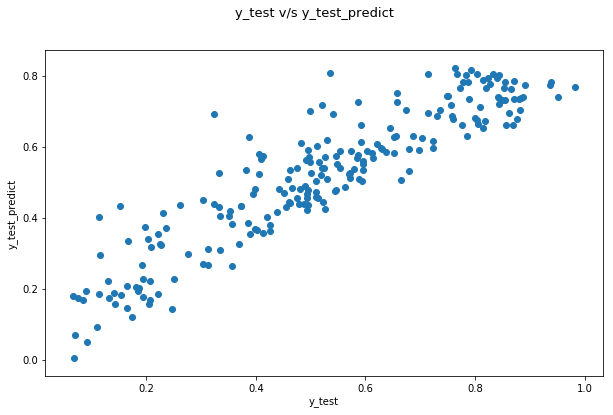

In [70]:
# Scatter plot of actual y_test and predicted y_test
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_predict)
fig.suptitle('y_test v/s y_test_predict', fontsize = 13)
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
plt.show()

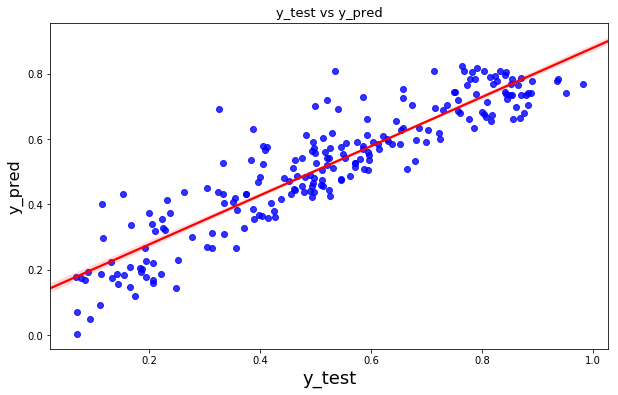

In [71]:
#Regression plot
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_test_predict, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=13) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Conclusion

We have build a decent linear regression model with R2 score of 0.823 on test dataset and 0.786 on training dataset.

The Adj. R2 on training dataset is 0.782 and on test dataset is 0.816.

The difference between training and test dataset Adjusted R2 is 0.034 (3.4%) which is less than 0.5 (5%) as expected.

The equation of our best fitted line is :

__y = 0.216548 + (0.227313 * yr) + (0.035684 * workingday) + (0.404852 * temp) + (-0.091801 * windspeed) + ( -0.116180 * spring ) + (0.036866 * winter) + (0.053631 * sept) + (0.040844 * mon) + (-0.236211 * light_snow_or_rain)__


As seen above, temperature variable has the highest coefficient which implies that if temperature increases by 1 unit, the number of bike rentals increase by 0.40485 unit.

Few variables like windspeed, spring and light snow/rain have negative impact and hence the negative coeeficients.

We also see that as year increases, the adoption of bike rentals is also increasing. The current pandemic may not be in favour for the business but we can use our above observations to accelerate decision makings as everything gets better.